In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Machine_Learning/df_glove (1).pkl')
df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Hotel_Country,review_month,Trip,Stayed nights,yr,reviews_processed,Combined_pos,Combined_neg,Combined_neu,Tokenized_Combined,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,241,8.2,138,2500,48,8,7.5,4,8,1,6,2016,bathtub sink flush not working properly even t...,0.155,0.024,0.821,"[bathtub, sink, flush, not, working, properly,...",0.129054,0.079749,-0.050408,-0.110894,0.102034,-0.064348,-0.012721,-0.248734,-0.054468,2.084704,-0.143764,-0.059989,-0.006257,0.010781,-0.189668,-0.082259,-0.125823,1.207873,-0.002224,-0.024382,-0.108933,0.106985,0.007620,...,0.118776,0.137813,0.059716,-0.039166,0.125360,-0.087997,-0.039846,0.060813,-0.182784,0.050778,-0.196915,-0.083890,-0.053765,-0.196452,-0.044017,0.084974,0.079902,-0.004446,0.018754,0.209559,0.140798,-0.057263,-0.047999,0.111542,-0.080811,-0.027021,0.131718,-0.071210,0.084022,0.105295,-0.071844,-0.008121,0.080809,-0.087931,0.127123,0.123818,-0.025628,-0.064460,0.003954,0.155291
1,493,8.6,23,2865,9,3,5.4,3,12,0,2,2016,bedroom tight small explain hotel built old fa...,0.000,0.000,1.000,"[bedroom, tight, small, explain, hotel, built,...",0.232902,0.022285,-0.259465,-0.089257,0.229690,-0.065396,-0.118838,-0.272194,0.032207,2.370185,-0.279649,-0.102468,0.024799,-0.017472,-0.264171,0.059629,0.012431,1.332335,0.114094,-0.080576,0.012140,-0.018307,0.075269,...,0.115185,-0.022977,0.137514,-0.057224,-0.128971,-0.204318,0.010752,-0.004391,-0.642758,0.019346,-0.233412,0.062402,-0.126798,-0.342792,-0.065422,-0.069778,0.156276,-0.028852,-0.028522,0.106706,0.198023,0.103284,-0.159746,0.080849,-0.027057,0.106564,0.139889,-0.042718,-0.043635,-0.056947,-0.147696,0.035572,0.146923,0.238108,0.158252,0.126047,0.027125,0.062785,-0.010463,0.116023
2,908,8.5,0,3980,13,8,9.2,5,2,1,1,2016,great ipads room breakfast amazing,0.725,0.000,0.275,"[great, ipads, room, breakfast, amazing]",-0.050798,0.298618,0.081325,-0.167925,0.009825,0.048860,0.040483,-0.396028,0.085866,1.622530,-0.009072,0.202159,-0.168738,0.143043,0.006637,-0.212327,-0.216294,1.085710,-0.135042,-0.100572,-0.100984,0.147156,0.093828,...,0.190686,-0.085137,0.000110,-0.050065,-0.121035,-0.017768,-0.081698,0.047383,-0.415252,0.301847,-0.709974,-0.000011,-0.053813,-0.348882,-0.218330,0.044074,-0.156776,-0.114451,0.074144,0.231735,0.106206,-0.085150,-0.334764,0.075018,0.081898,0.054297,0.513510,0.114639,-0.239345,0.294506,-0.077523,0.086594,0.134304,-0.001710,0.050460,0.304261,0.147864,-0.178569,-0.066553,0.253098
3,117,8.3,47,694,79,1,9.2,1,7,1,6,2017,one small issue room coffee machine come stand...,0.405,0.000,0.595,"[one, small, issue, room, coffee, machine, com...",0.057820,0.084160,-0.089397,-0.042833,0.119603,-0.090004,0.039040,-0.231818,0.007156,2.038811,-0.107081,-0.050753,-0.007168,-0.038500,-0.174421,-0.108466,-0.095586,1.105595,-0.014705,-0.018331,-0.124436,0.035957,0.022945,...,-0.023400,0.113343,0.041654,-0.028180,0.048262,-0.048009,0.012427,0.103105,-0.171147,0.118400,-0.273646,-0.017545,-0.005818,-0.297648,-0.137878,0.073372,0.049315,-0.027886,0.079371,0.220657,0.110310,0.075255,-0.069140,0.060093,-0.061836,-0.044726,0.144833,-0.045666,0.058723,0.071528,-0.073542,0.048310,0.121087,0.045395,0.157800,0.140316,0.097595,-0.057159,0.022012,0.141138
4,300,9.0,68,1254,25,1,9.6,5,3,1,1,2016,price breakfast high went amazing cafe road hi...,0.342,0.077,0.581,"[price, breakfast, high, went, amazing, cafe, ...",0.107600,0.279675,-0.087220,-0.105403,0.166572,0.027403,0.019040,-0.164288,-0.041115,2.092286,-0.201163,0.081607,-0.000543,-0.018393,-0.145548,-0.097080,-0.123835,1.218874,-0.071706,-0.076328,-0.071687,0.026098,-0.014527,...,0.097045,0.074463,0.128536,-0.037402,0.057124,-0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# we have null values as the word's representation in the form of vector is not present in the glove file
#hence we can drop as there is < 0.1% of missing vectorization of the words
df.isnull().sum()

Additional_Number_of_Scoring          0
Average_Score                         0
Review_Total_Negative_Word_Counts     0
Total_Number_of_Reviews               0
Review_Total_Positive_Word_Counts     0
                                     ..
295                                  51
296                                  51
297                                  51
298                                  51
299                                  51
Length: 317, dtype: int64

In [ ]:
df = df.dropna()
df.shape

(49626, 317)

In [ ]:
X = df.drop(['Combined_pos','Combined_neg','Combined_neu','reviews_processed','Tokenized_Combined','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews','Review_Total_Positive_Word_Counts'],axis=1)
y = df['Combined_pos']
y1 = df['Combined_neg']

In [ ]:
X.head()

,Additional_Number_of_Scoring,Average_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Hotel_Country,review_month,Trip,Stayed nights,yr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,241,8.2,8,7.5,4,8,1,6,2016,0.129054,0.079749,-0.050408,-0.110894,0.102034,-0.064348,-0.012721,-0.248734,-0.054468,2.084704,-0.143764,-0.059989,-0.006257,0.010781,-0.189668,-0.082259,-0.125823,1.207873,-0.002224,-0.024382,-0.108933,0.106985,0.007620,-0.081260,0.009534,-0.032365,-0.127256,-0.088589,-0.010015,0.015200,0.035668,...,0.118776,0.137813,0.059716,-0.039166,0.125360,-0.087997,-0.039846,0.060813,-0.182784,0.050778,-0.196915,-0.083890,-0.053765,-0.196452,-0.044017,0.084974,0.079902,-0.004446,0.018754,0.209559,0.140798,-0.057263,-0.047999,0.111542,-0.080811,-0.027021,0.131718,-0.071210,0.084022,0.105295,-0.071844,-0.008121,0.080809,-0.087931,0.127123,0.123818,-0.025628,-0.064460,0.003954,0.155291
1,493,8.6,3,5.4,3,12,0,2,2016,0.232902,0.022285,-0.259465,-0.089257,0.229690,-0.065396,-0.118838,-0.272194,0.032207,2.370185,-0.279649,-0.102468,0.024799,-0.017472,-0.264171,0.059629,0.012431,1.332335,0.114094,-0.080576,0.012140,-0.018307,0.075269,0.071007,0.167984,-0.057332,-0.124668,0.003925,-0.135837,0.247754,0.180954,...,0.115185,-0.022977,0.137514,-0.057224,-0.128971,-0.204318,0.010752,-0.004391,-0.642758,0.019346,-0.233412,0.062402,-0.126798,-0.342792,-0.065422,-0.069778,0.156276,-0.028852,-0.028522,0.106706,0.198023,0.103284,-0.159746,0.080849,-0.027057,0.106564,0.139889,-0.042718,-0.043635,-0.056947,-0.147696,0.035572,0.146923,0.238108,0.158252,0.126047,0.027125,0.062785,-0.010463,0.116023
2,908,8.5,8,9.2,5,2,1,1,2016,-0.050798,0.298618,0.081325,-0.167925,0.009825,0.048860,0.040483,-0.396028,0.085866,1.622530,-0.009072,0.202159,-0.168738,0.143043,0.006637,-0.212327,-0.216294,1.085710,-0.135042,-0.100572,-0.100984,0.147156,0.093828,-0.334318,0.003712,-0.006436,-0.149122,-0.158501,-0.229424,0.082491,0.126938,...,0.190686,-0.085137,0.000110,-0.050065,-0.121035,-0.017768,-0.081698,0.047383,-0.415252,0.301847,-0.709974,-0.000011,-0.053813,-0.348882,-0.218330,0.044074,-0.156776,-0.114451,0.074144,0.231735,0.106206,-0.085150,-0.334764,0.075018,0.081898,0.054297,0.513510,0.114639,-0.239345,0.294506,-0.077523,0.086594,0.134304,-0.001710,0.050460,0.304261,0.147864,-0.178569,-0.066553,0.253098
3,117,8.3,1,9.2,1,7,1,6,2017,0.057820,0.084160,-0.089397,-0.042833,0.119603,-0.090004,0.039040,-0.231818,0.007156,2.038811,-0.107081,-0.050753,-0.007168,-0.038500,-0.174421,-0.108466,-0.095586,1.105595,-0.014705,-0.018331,-0.124436,0.035957,0.022945,-0.143455,0.016697,-0.038881,-0.081588,-0.097506,-0.037626,-0.075746,0.050078,...,-0.023400,0.113343,0.041654,-0.028180,0.048262,-0.048009,0.012427,0.103105,-0.171147,0.118400,-0.273646,-0.017545,-0.005818,-0.297648,-0.137878,0.073372,0.049315,-0.027886,0.079371,0.220657,0.110310,0.075255,-0.069140,0.060093,-0.061836,-0.044726,0.144833,-0.045666,0.058723,0.071528,-0.073542,0.048310,0.121087,0.045395,0.157800,0.140316,0.097595,-0.057159,0.022012,0.141138
4,300,9.0,1,9.6,5,3,1,1,2016,0.107600,0.279675,-0.087220,-0.105403,0.166572,0.027403,0.019040,-0.164288,-0.041115,2.092286,-0.201163,0.081607,-0.000543,-0.018393,-0.145548,-0.097080,-0.123835,1.218874,-0.071706,-0.076328,-0.071687,0.026098,-0.014527,-0.134299,0.043193,0.090234,-0.097431,-0.163667,-0.100003,0.013889,0.122834,...,0.097045,0.074463,0.128536,-0.037402,0.057124,-0.070652,0.083820,0.083511,-0.005633,0.158433,-0.329919,0.045875,-0.017567,-0.139160,-0.076024,0.123302,0.060318,-0.057109,0.063125,0.195863,0.126020,0.016282,-0.014043,0.100787,-0.102289,0.066553,0.217190,-0.001552,0.031247,-0.011544,-0.163340,0.149986,0.025859,0.049964,0.169566,0.005540,0.042863,-0.024802,0.030713,0.171618


In [ ]:
y.head()

0    0.155
1    0.000
2    0.725
3    0.405
4    0.342
Name: Combined_pos, dtype: float64

In [ ]:
# # DecisionTree

# # #sub model1: where target variable is 'Combined_pos'

# param ={'dt__max_depth':np.arange(1,100)}

# # preprocessor.fit_transform(df)
# pipeline = Pipeline([
#                     #  ('preprocessor', preprocessor),
#                    ('sc',StandardScaler()),
#                    ('dt', DecisionTreeRegressor()),
# ])
# grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
# grid.fit(X,y)
# grid.best_params_
# # grid.get_params().keys()

In [ ]:

# full_model1 = Pipeline([
#                         # ('preprocessor', preprocessor),
#                    ('sc',StandardScaler()),
#                    ('dt', DecisionTreeRegressor(max_depth=36)),
# ])
# full_model1.fit(X,y)
# scores = model_selection.cross_val_score(full_model1, X, y, cv= 3, scoring='neg_mean_squared_error')
# rmse = np.sqrt(np.abs(scores))
# print('bias_error',np.mean(rmse))
# print('var_error',np.std(rmse,ddof=1))

In [ ]:
# # #sub model2: where target variable is 'Combined_neg'

# param ={'dt__max_depth':np.arange(1,100)}
# pipeline = Pipeline([
#                     #  ('preprocessor', preprocessor),
#                    ('sc',StandardScaler()),
#                    ('dt', DecisionTreeRegressor()),
# ])
# grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
# grid.fit(X,y1)
# grid.best_params_
# # grid.get_params().keys()

In [ ]:
# full_model2 = Pipeline([
#                         # ('preprocessor', preprocessor),
#                    ('sc',StandardScaler()),
#                    ('dt', DecisionTreeRegressor(max_depth=22)),
# ])
# full_model2.fit(X,y1)
# scores = model_selection.cross_val_score(full_model2, X, y1, cv= 3, scoring='neg_mean_squared_error')
# rmse = np.sqrt(np.abs(scores))
# print('bias_error',np.mean(rmse))
# print('var_error',np.std(rmse,ddof=1))

In [ ]:
# #Random Forest model :
# #sub model1 : where target variable is 'Combined_pos'
# rf_be=[]
# rf_ve=[]
# for n in np.arange(1,25):
#   rf = RandomForestRegressor(n_estimators=n)
#   kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
#   score=model_selection.cross_val_score(rf,X,y,cv=kf,scoring='neg_mean_squared_error')
#   rmse = np.sqrt(np.abs(score))
#   rf_be.append(np.mean(rmse)),rf_ve.append(np.std(rmse,ddof=1))

In [ ]:
# x_axis=np.arange(len(rf_ve))
# plt.plot(x_axis,rf_ve)
# np.min(rf_ve),np.argmin(rf_ve)

In [ ]:
# rf_ve

In [ ]:
# rf_ve,np.argmin(rf_ve)

In [ ]:
# #sub model2 : where target variable is 'Combined_neg'
# #Random Forest model :
# #sub model1 : where target variable is 'Combined_pos'
# rf_be1=[]
# rf_ve1=[]
# for n in np.arange(1,25):
#   rf1 = RandomForestRegressor(n_estimators=n)
#   kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
#   # kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
#   score=model_selection.cross_val_score(rf1,X,y1,cv=kf,scoring='neg_mean_squared_error')
#   rmse = np.sqrt(np.abs(score))
#   rf_be1.append(np.mean(rmse)),rf_ve1.append(np.std(rmse,ddof=1))
#   # rf_be1.append(np.mean(score)),rf_ve1.append(np.std(score,ddof=1))

In [ ]:
# x_axis=np.arange(len(rf_ve1))
# plt.plot(x_axis,rf_ve1)
# np.min(rf_ve1),np.argmin(rf_ve1)

In [ ]:
# plt.plot([1,2,3,4,5,6,7,8,9],rf_be1,label='BE')
# plt.plot([1,2,3,4,5,6,7,8,9],rf_ve1,label = 'VE')
# plt.legend()

In [ ]:
#with best n_estimators:
# rf1 = RandomForestRegressor(n_estimators=2)
# score=model_selection.cross_val_score(rf1,X,y1,cv= 3,scoring='neg_mean_squared_error')
# rmse=np.sqrt(np.abs(score))
# np.mean(rmse),np.std(rmse,ddof=1)

In [ ]:
#ada_boost_default_pos
param ={'ab__n_estimators':np.arange(1,25)}

# preprocessor.fit_transform(df)
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('ab', AdaBoostRegressor()),
])
kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
grid = GridSearchCV(pipeline, param_grid= param,cv=kf,scoring='neg_mean_squared_error')
grid.fit(X,y)
grid.best_params_

{'ab__n_estimators': 6}

In [ ]:
#ada_boost_default_neg

param ={'ab__n_estimators':np.arange(1,25)}

# preprocessor.fit_transform(df)
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('ab', AdaBoostRegressor()),
])
kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
grid = GridSearchCV(pipeline, param_grid= param,cv=kf,scoring='neg_mean_squared_error')
grid.fit(X,y1)
grid.best_params_

{'ab__n_estimators': 1}

In [ ]:
#Manideep

#Gradient_Boosting_Regressor : Combined_pos

param ={'grad_boost_pos__n_estimators':np.arange(1,25)}
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('grad_boost_pos', GradientBoostingRegressor()),
])
grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
grid.fit(X,y)
grid.best_params_

{'grad_boost_pos__n_estimators': 24}

In [ ]:
#Manideep

#Gradient_Boosting_Regressor : Combined_neg

param ={'grad_boost_neg__n_estimators':np.arange(1,25)}
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('grad_boost_neg', GradientBoostingRegressor()),
])
grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
grid.fit(X,y1)
grid.best_params_

{'grad_boost_neg__n_estimators': 24}

In [ ]:
#finalized_Models_ALL

# #finalized_Models_ALL

In [ ]:
#FINALIZED_MODELS:
# Srujan

#Decision_tree_regressor: Combined_pos 
param ={'dt__max_depth':np.arange(1,25)}

# preprocessor.fit_transform(df)
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('dt', DecisionTreeRegressor()),
])
kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
grid = GridSearchCV(pipeline, param_grid= param,cv=kf,scoring='neg_mean_squared_error')
grid.fit(X,y)
grid.best_params_
#srujan ran this : got best params as 8

In [ ]:
# Srujan

#Decision_tree_regressor: Combined_neg
param ={'dt__max_depth':np.arange(1,25)}

# preprocessor.fit_transform(df)
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('dt', DecisionTreeRegressor()),
])
kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
grid = GridSearchCV(pipeline, param_grid= param,cv=kf,scoring='neg_mean_squared_error')
grid.fit(X,y1)
grid.best_params_
#srujan ran this : got best params as 6

In [ ]:
# Srujan

# KNN Regressor : Combined_pos
# customised grid search CV
knn_be=[]
knn_ve=[]
for i in np.arange(1,25):
  knn=KNeighborsRegressor(n_neighbors=i)
  kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  score=model_selection.cross_val_score(knn,X,y,cv=kf,scoring='neg_mean_squared_error')
  rmse = np.sqrt(np.abs(score))
  knn_be.append(np.mean(rmse)),knn_ve.append(np.std(rmse,ddof=1))

# Srujan

print(np.min(knn_ve))       #0.001411085759125044
arg_var = np.argmin(knn_ve)
print(arg_var) #17
print(knn_be[arg_var]) #0.21614155248966016

In [ ]:
# Godwin

# KNN Regressor : Combined_neg
# customised grid search CV
knn_be1=[]
knn_ve1=[]
for i in np.arange(1,25):
  knn=KNeighborsRegressor(n_neighbors=i)
  kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  score=model_selection.cross_val_score(knn,X,y1,cv=kf,scoring='neg_mean_squared_error')
  rmse = np.sqrt(np.abs(score))
  knn_be1.append(np.mean(rmse)),knn_ve1.append(np.std(rmse,ddof=1))

# Godwin

print(np.min(knn_ve1)) #0.00133
arg_var1 = np.argmin(knn_ve1) 
print(arg_var1) #2
print(knn_be1[arg_var1]) 0.141168

In [ ]:
#Sai

#Gradient_Boosting_Regressor : Combined_neg

param ={'grad_boost_neg__n_estimators':np.arange(25,50)}
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('grad_boost_neg', GradientBoostingRegressor()),
])
grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
grid.fit(X,y1)
grid.best_params_

{'grad_boost_neg__n_estimators': 49}

In [ ]:
# RF_Boosting_Regressor : Combined_pos

RF_pos = RandomForestRegressor(n_estimators = 5)  # Random_Forest : n_estimators = 5 (already tuned), combined_pos

param ={'rf_boost_pos__n_estimators':np.arange(1,25)}
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('rf_boost_pos', AdaBoostRegressor(base_estimator= RF_pos)),
])
grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
grid.fit(X,y)
grid.best_params_

In [ ]:
#Summarize all tuned models
dt_reg_pos=DecisionTreeRegressor(max_depth=8,random_state=0) # updated
dt_reg_neg=DecisionTreeRegressor(max_depth=6,random_state=0) # updated
KNN_pos=KNeighborsRegressor(n_neighbors=2) #updated
KNN_neg=KNeighborsRegressor(n_neighbors=1) #updated
ada_boost_pos = AdaBoostRegressor(n_estimators=7,random_state=0) #updated
ada_boost_neg = AdaBoostRegressor(n_estimators=2,random_state=0) #updated
rf_pos = RandomForestRegressor(n_estimators=5,random_state=0) #updated
rf_neg = RandomForestRegressor(n_estimators=2,random_state=0) #updated
KNN_bagging_pos = BaggingRegressor(base_estimator = KNN_pos,n_estimators=23) #updated
KNN_bagging_neg = BaggingRegressor(base_estimator = KNN_neg,n_estimators=2) 
RF_boost_pos=AdaBoostRegressor(base_estimator=rf_pos,n_estimators=24,random_state=0) #updatd
RF_boost_neg=AdaBoostRegressor(base_estimator=rf_neg,n_estimators=24,random_state=0) #updated
GBoost_pos=GradientBoostingRegressor(n_estimators=25,random_state=0) #updated
GBoost_neg=GradientBoostingRegressor(n_estimators=25,random_state=0) #updated


# stacked = VotingClassifier(estimators = [('Bagged_LR',LR_bag),('Logistic', LR), ('BoostedDT', dt_boost)],voting='soft')

In [ ]:
models=[]
models.append(('DecTree_Pos',dt_reg_pos))
models.append(('DecTree_Neg',dt_reg_neg))
models.append(('KNN_Pos',KNN_pos))
models.append(('KNN_neg',KNN_neg))
models.append(('AdaBoost_pos',ada_boost_pos))
models.append(('Adaboost_neg',ada_boost_neg))
models.append(('RF_pos',rf_pos))
models.append(('RF_neg',rf_neg))
models.append(('Bagged_KNN_pos',KNN_bagging_pos))
models.append(('Bagged_KNN_neg',KNN_bagging_neg))
models.append(('Boosted_RF_pos',RF_boost_pos))
models.append(('Boosted_RF_neg',RF_boost_neg))
models.append(('Gboost_pos',GBoost_pos))
models.append(('Gboost_neg',GBoost_neg))



DecTree_Pos         -->bias_error: 0.166688-->variance_error: 0.001243
DecTree_Neg         -->bias_error: 0.169561-->variance_error: 0.000465
KNN_Pos             -->bias_error: 0.236571-->variance_error: 0.001355
KNN_neg             -->bias_error: 0.261692-->variance_error: 0.001726
AdaBoost_pos        -->bias_error: 0.175734-->variance_error: 0.000627
Adaboost_neg        -->bias_error: 0.185128-->variance_error: 0.001105
RF_pos              -->bias_error: 0.150233-->variance_error: 0.001260
RF_neg              -->bias_error: 0.171533-->variance_error: 0.001042
Bagged_KNN_pos      -->bias_error: 0.225945-->variance_error: 0.001406
Bagged_KNN_neg      -->bias_error: 0.250554-->variance_error: 0.000814
Boosted_RF_pos      -->bias_error: 0.130985-->variance_error: 0.000999
Boosted_RF_neg      -->bias_error: 0.132480-->variance_error: 0.000624
Gboost_pos          -->bias_error: 0.156774-->variance_error: 0.001246
Gboost_neg          -->bias_error: 0.156774-->variance_error: 0.001246


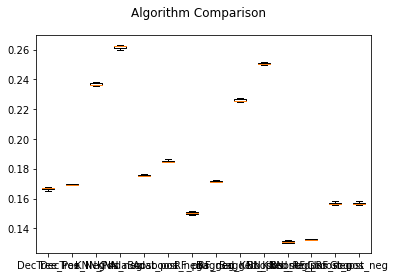

In [ ]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y,cv=kfold,scoring='neg_mean_squared_error')
	rmse = np.sqrt((np.abs(cv_results)))
	results.append(rmse)
	names.append(name)
	print('{:20s}-->bias_error: {:2f}-->variance_error: {:2f}'.format(name, np.mean(rmse),np.std(rmse,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
all_positive_models = results[0::2]
all_positive_names = names[0::2]

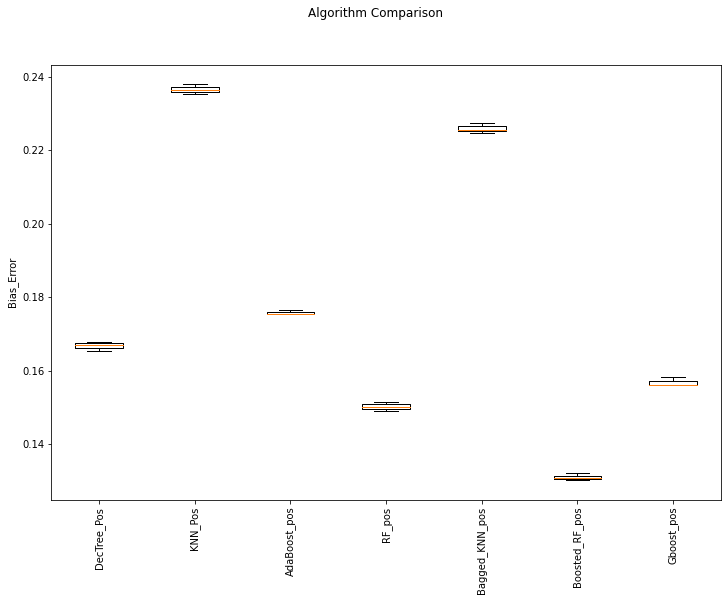

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(all_positive_models)
ax.set_xticklabels(all_positive_names)
plt.xticks(rotation=90)
plt.ylabel('Bias_Error')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
np.mean(results[0])

-0.024928963573496384

In [ ]:
np.mean(results[0])

0.15788297085346556

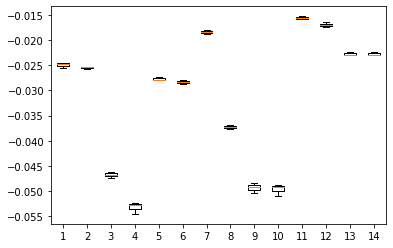

In [ ]:
plt.boxplot(results)
plt.show()